In [93]:
# import thư viện
import numpy as np
import random
from collections import Counter
from matplotlib import pyplot as plt
import math
import time

# Câu 1 (1 điểm)

## Giải bằng lý thuyết

Gọi X biến cố tung đồng xu, không gian mẫu {0, 1}, p(0) = p(1) = 0.5.

Ta có :

$p(x_1 = 0|x_2 = 0) = p(x_1 = 0|x_2 = 1) = p(x_1 = 1|x_2 = 0) = p(x_1 = 1|x_2 = 1) = 0.5*0.5 = 0.25$

Gọi P là xác xuất cho không gian mẫu (không gồm TH $p(x_1 = 0|x_2 = 0)$).

P = 0.25 * 3 = 0.75

Vậy xác suất 3 TH có trong không gian mẫu là bằng nhau = $\frac{0.25}{0.75} = \frac{1}{3}$ 


## Mô phỏng

In [94]:
def toss_coin(p = 0.7):
    pp = np.random.rand()
    if pp < p: 
        return 1
    else:
        return 0

In [95]:
def toss_balance_coin():
    while True:
        m1 = toss_coin()
        m2 = toss_coin()
        if (m1 != m2):
            return m1

In [96]:
def cau_1():
    while True:
        m1 = toss_balance_coin()
        m2 = toss_balance_coin()
        if (m1 == 0 and m2 == 0):
            return 0
        elif (m1 == 1 and m2 == 1):
            return 1
        elif (m1 == 1 and m2 == 0):
            return 2

N = 100000
sl1 = Counter(cau_1() for _ in range(N))
print([(i, sl1[i]/N) for i in range(3)])

[(0, 0.33378), (1, 0.33542), (2, 0.3308)]


# Câu 2 (2 điểm)

## a/ Thiết kế thuật toán sinh ngẫu nhiên các tập con kích thước 𝑘 (0 ≤ 𝑘 ≤ 𝑛) của 𝑆 (tức là các tập con kích thước 𝑘 đều có cùng xác suất được sinh ra).

In [97]:
def rand_k(n):
    k = math.floor(np.random.rand()*n + 1)
    return k
        
def rand_sample(n, k):
    x = [i for i in range(1, n+1)]
    sample = []
    count = 0
    while count < k:
        tmp = rand_k(len(x))
        sample.append(x[tmp-1])
        x.remove(x[tmp-1])
        count += 1
    return sample


In [98]:
rand_sample(5, 2)

[3, 4]

In [99]:
# cell test xác suất rút được tập {1, 3}
sll = 0
n = 100000
for i in range(n):
    sample = rand_sample(5, 2)
    if sorted(sample) == [1, 3]:
        sll += 1
sll/n

0.10175

Số lượng tập 2 phần tử có thể bốc từ tập 5 phần tử là $C^{2}_{5} = 10$

Vậy xác suất rút được tập {1, 3} là: 1/10 = 0.1

## b/ Dùng thuật toán trên để ước lượng xác suất của biến cố “bốc ngẫu nhiên 13 lá bài từ bộ bài Tây, bốc được tứ quý heo”.

### Giải bằng lý thuyết.

- Không gian mẫu là số cách chọn 13 lá bài từ 52 lá: $C^{13}_{52}$.

- Số cách chọn 13 lá bài có tứ quý heo: $C^{4}_{4} * C^{9}_{48}$.

- Xác xuất bốc ngẫu nhiên 13 lá bài có tứ quý heo là: $\frac{C^{4}_{4} * C^{9}_{48}}{C^{13}_{52}} = \frac{11}{4165} \approx 0.0026$

### Mô phỏng.

In [100]:
def rand_sample_card():
    x = []
    [[x.append(i) for _ in range(4)] for i in range(1,14)] # tạo bộ bài tây vào X
    sample = []
    count = 0
    while count < 13:
        tmp = rand_k(len(x))
        sample.append(x[tmp-1])
        x.remove(x[tmp-1])
        count += 1
    return sample

def P_pick_four_pigs(N):
    sl_ac = 0
    for i in range(N):
        sample = rand_sample_card()
        if Counter(sample)[2] == 4:
            sl_ac += 1
    return sl_ac/N

N = 10**5
P_pick_four_pigs(N)

0.0022

## c/ Thiết kế thuật toán sinh ngẫu nhiên các tập con của 𝑆 (tức là các tập con đều có cùng xác suất được sinh ra).

- Xây dựng phân phối tích lũy để tích lũy xác xuất cho mỗi tập có k phần tử có thể lấy.
- Sau đó rand số lượng phần tử của 1 tập theo pp tích lũy trên.
- Rand ra phần tử của tập đó.

In [101]:
def rand_sample_K(n):
    P = []
    sum = 0
    for i in range(0, n+1): # Tính xs tập k phần tử có thể ra.
        sum += math.comb(n,i)/2**n
        P.append(sum)

    percent = np.random.rand() # xem rơi vào tập có bao nhiêu phần tử.
    for i in range(0, len(P)):
        if P[i] >= percent: return rand_sample(n, i)

In [102]:
rand_sample_K(4)

[3, 4, 1]

In [103]:
# cell test 
sll = 0
n = 10**5
for i in range(n):
    sample = rand_sample_K(5)
    if sorted(sample) == [1, 2]:
        sll += 1
sll/n

0.0315

Số lượng tập lấy được từ 5 phần tử: $2^5 = 32$ 

Xác suất lấy được tập {1, 2} = 1/32 = 0.03125.

# Câu 3 (2 điểm) Thực hiện các yêu cầu sau cho biến ngẫu nhiên 𝑋 có phân phối nhị thức với tham số 𝑛, 𝑝 cho trước.

## a/ Thiết kế thuật toán sinh 𝑋 được phép dùng nhiều số ngẫu nhiên 𝒰(0, 1).

In [104]:
def p_NT(n, p):
    kq = []
    for _ in range(n):
        percent = np.random.rand()
        if percent <= p: kq.append(1)
        else: kq.append(0)
    return kq

<BarContainer object of 11 artists>

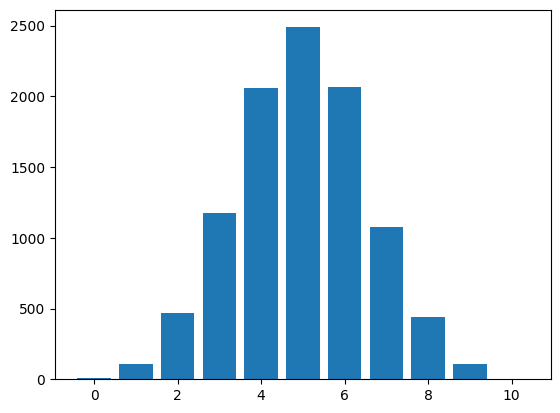

In [105]:
N = 10000

n = 10
p = 0.5
x = [i for i in range(n+1)]
y = [0 for i in range(n+1)]
for _ in range(N):
    y[Counter(p_NT(n, p))[1]] += 1

plt.bar(x, y)

## b/ Thiết kế thuật toán sinh 𝑋 chỉ được dùng một số ngẫu nhiên 𝒰(0, 1).

Sử dụng hàm phân phối tích lũy của phân phối nhị thức từ đó chỉ dùng 1 biến ngẫu nhiên U.

In [106]:
def p_NT_1_U(n, p):
    U = np.random.rand()
    sum = 0
    i = 0
    while(True):
        sum += math.comb(n, i)*(p**(i))*((1-p)**(n-i))
        if sum >= U:
            return i
        i += 1

<BarContainer object of 11 artists>

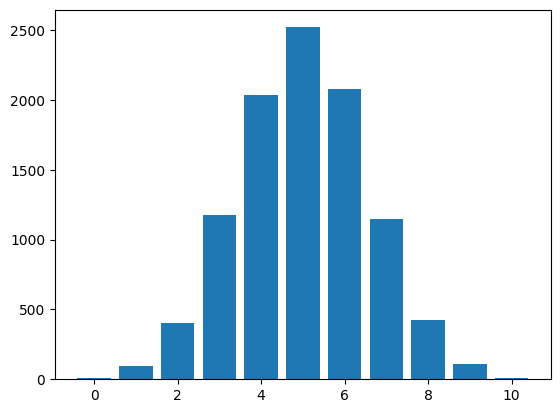

In [107]:
N = 10000
n = 10
p = 0.5
x = [i for i in range(n+1)]
y = [0 for i in range(n+1)]
for _ in range(N):
    y[p_NT_1_U(n, p)] += 1

plt.bar(x, y)

## c/ So sánh thời gian chạy của 2 thuật toán với các trường hợp: 𝑛 = 10, 𝑝 = 0.5 và 𝑛 = 1000, 𝑝 = 0.005.

In [108]:
def time_calculation(n, p, tmp): # hàm tính thời gian
    y_tmp = []
    for _ in range(20):
        if tmp == 1:
            start_time = time.time()
            p_NT(n, p)
            end_time = time.time()
        else:
            start_time = time.time()
            p_NT_1_U(n, p)
            end_time = time.time()

        elapsed_time = end_time - start_time
        y_tmp.append(elapsed_time)
    return y_tmp

### TH 𝑛 = 10, 𝑝 = 0.5.

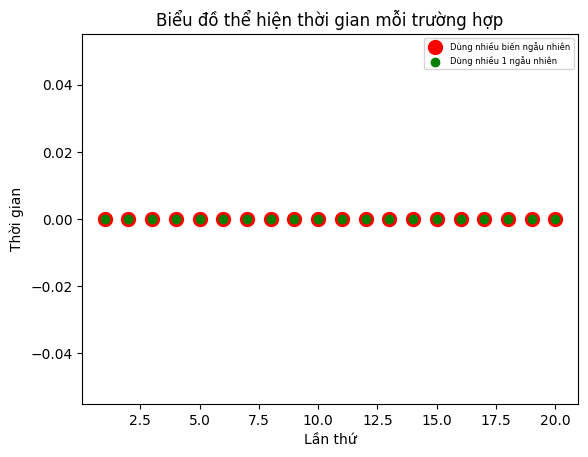

In [109]:
# TH n = 10, p = 0.5
x = np.linspace(1, 20, 20)
y1 = time_calculation(10, 0.5, 1)
y2 = time_calculation(10, 0.5, 2)
plt.scatter(x, y1, c='red', s = 100)
plt.scatter(x, y2, c='green')
plt.legend(["Dùng nhiều biến ngẫu nhiên", "Dùng nhiều 1 ngẫu nhiên"], fontsize = 6)
plt.xlabel("Lần thứ")
plt.ylabel("Thời gian")
plt.title("Biểu đồ thể hiện thời gian mỗi trường hợp")
plt.show()

### TH 𝑛 = 1000, 𝑝 = 0.005

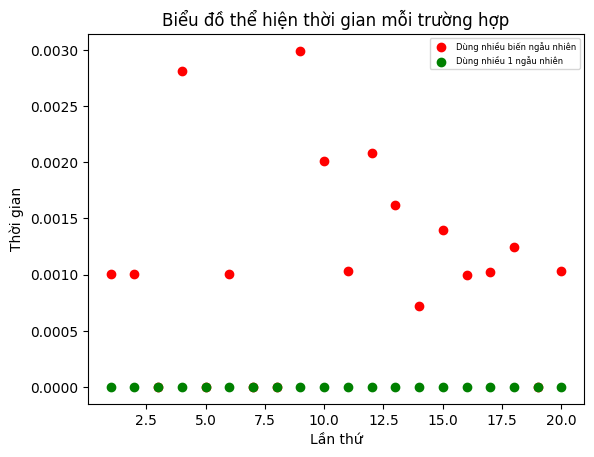

In [110]:
# TH n = 1000, p = 0.005
x = np.linspace(1, 20, 20)
y1 = time_calculation(1000, 0.005, 1)
y2 = time_calculation(1000, 0.005, 2)
plt.scatter(x, y1, c='red')
plt.scatter(x, y2, c='green')
plt.legend(["Dùng nhiều biến ngẫu nhiên", "Dùng nhiều 1 ngẫu nhiên"], fontsize = 6)
plt.xlabel("Lần thứ")
plt.ylabel("Thời gian")
plt.title("Biểu đồ thể hiện thời gian mỗi trường hợp")
plt.show()

        Nhận xét 
- TH n = 10, p = 0.5 do n bé nên cho thời gian gần như bằng 0 trong cả hai trường hợp. Biểu đồ trực quan cho thấy các điểm nằm chồng lên nhau.
- TH n = 1000, p = 0.005 có n khá lớn. Trường hợp sinh phân phối chỉ dùng 1 U vẫn có kết quả gần như bằng 0, còn khi dùng nhiều biến ngẫu nhiên cho các kết quả lớn hơn 0 trong các lần thử nghiệm (khoảng 0.001).

`Kết luận:` Việc dùng 1 biến ngẫu nhiên cho hiệu năng thuật toán cao hơn việc dùng nhiều biến ngẫu nhiên.

# Câu 4 (1,5 điểm)

**Cho 𝑋 là biến ngẫu nhiên có hàm mật độ xác suất**

$$f(x) = 
\begin{cases}
(e^{x})/(e - 1)  & 0 \leq x \leq 1 \\
0  & khác
\end{cases}
$$

## a/ Thiết kế 2 thuật toán khác nhau sinh 𝑋.

### Cách 1: Tìm hàm ngược.

$\displaystyle\int_{-\infty}^{x} f(t)dt = \displaystyle\int_{0}^{x} \frac{e^{t}}{e - 1}dt = \frac{e^{x}}{e - 1} - \frac{1}{e - 1} = u$

$<=> e^x = u(e - 1) + 1$

$<=> x = ln(u(e - 1) + 1)$

$=> F^{-1}(u) = ln(u(e - 1) + 1)$  với $u \in (0, 1) $


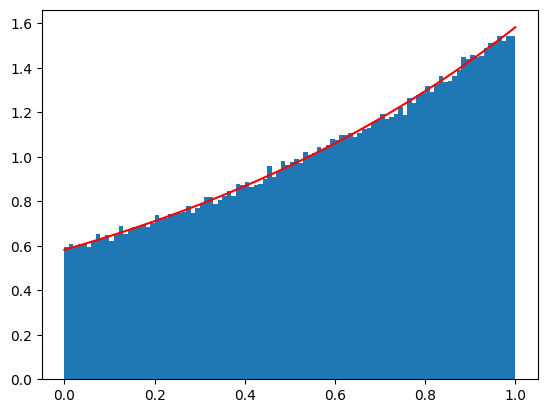

In [111]:
def sinh_X():
    u = np.random.rand()
    X = np.log(u*(np.e - 1)+1)
    return X

N = 4*(10**5)
X1 = [sinh_X() for _ in range(N)]
plt.hist(X1, bins=100, density=True)
x = np.linspace(0, 1, 100)
y = np.e**x / (np.e-1)
plt.plot(x, y,'red')
plt.show()

### Cách 2: Lấy mẫu loại bỏ.

Acceptance rate (Z): 0.6327


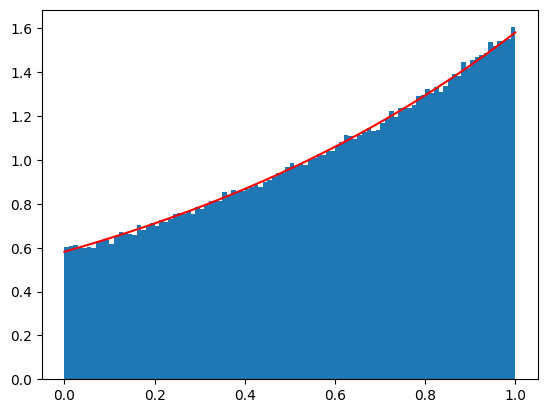

In [112]:
def Rejection_Sampling(n):
    T = 0
    ac = []
    i = 0
    while i < n:
        T += 1
        x = np.random.rand()
        y = np.random.rand()*(np.e/ (np.e-1))
        if y <= np.e**x / (np.e-1):
            i += 1
            ac.append(x)
    return ac, T
        
N = 4*(10**5)
t = np.linspace(0, 1, num=100)
X2 = Rejection_Sampling(N)
plt.hist(X2[0], bins=100, density=True)
plt.plot(t, np.e**t / (np.e-1), "red")

print("Acceptance rate (Z):", round(N/X2[1], 4))

## b/ So sánh 2 thuật toán

         với N = 10^6.

In [113]:
print("Tỉ lệ thành công cách 2", round(N/X2[1], 4))
print('Số lần gieo của cách 2:', X2[1])

Tỉ lệ thành công cách 2 0.6327
Số lần gieo của cách 2: 632210


|<center><div style="width:150px">Tiêu chí</div><center>|<center><div style="width:150px">Cách 1</div><center>|<center><div style="width:290px">Cách 2</div><center>|<center><div style="width:290px">Giải thích</div><center>|
|----------|----------|---------- |:-------------:|
|<center>Tỉ lệ thành công mỗi lần gieo<center>| <center>100%<center>  | <center>~63%<center> | <center>Cách 2 mẫu bị loại chiếm ~37%<center> |
|<center>Số biến ngẫu nhiêu được sử dụng mỗi lần gieo<center>| <center>1 biến<center>  |   <center>>2 biến<center>   |  <center>Cách 2: ~63% khả năng mẫu được chấp nhận <center> |
|<center>Số lần sinh<center>| <center> 10^6 <center>  |<center>~1580000 > 10^6<center> | <center>Vì có mẫu bị loại nên ta gieo đến khi đủ 10^6 mẫu được chấp nhận<center> |
|<center>Thời gian<center>| <center>Nhanh hơn cách 2<center>  | <center>Chậm hơn cách 1<center> | <center>Vì tốn nhiều biến ngẫu nhiên hơn, số lần sinh nhiêu hơn<center> |


# Câu 5 (2 điểm)

**Cho 𝑋 là biến ngẫu nhiên có hàm mật độ xác suất**
$$f(x) = 
\begin{cases}
x^{2}  & -1 \leq x \leq 0 \\
x  & 0 \leq x \leq 1 \\
1  & 1 \leq x \leq 2 \\
0  & khác 
\end{cases}
$$

**Hàm mật độ xác suất có dạng.**

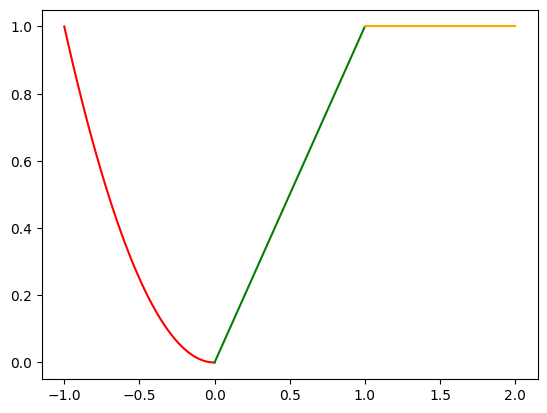

In [114]:
t = np.linspace(-1, 0, 100)
y = t**2
plt.plot(t, y,'red')
t = np.linspace(0, 1, 100)
y = t
plt.plot(t, y,'green')
t = np.linspace(1, 2, 100)
y = t*0 + 1
plt.plot(t, y, 'orange')

## a/ Thiết kế 2 thuật toán khác nhau sinh 𝑋

### Cách 1: Tìm hàm ngược

Lấy nguyên hàm f(x) ta được hàm phân phối tích lũy:
$$F(x) \sim
\begin{cases}
0 & x < -1 \\
x^{3}/3  & -1 \leq x \leq 0 \\
x^2/2  & 0 \leq x \leq 1 \\
x  & 1 \leq x \leq 2 \\
1  & x>2
\end{cases}
$$

Ta tính được hàm ngược:
$$F^{-1}(u) \sim
\begin{cases}
\sqrt[3]{3u} & -1/3 \leq u \leq 0 \\
\sqrt{2u}  & 0 \leq u \leq 1/2 \\
u  & 1 \leq u \leq 2 
\end{cases}
$$

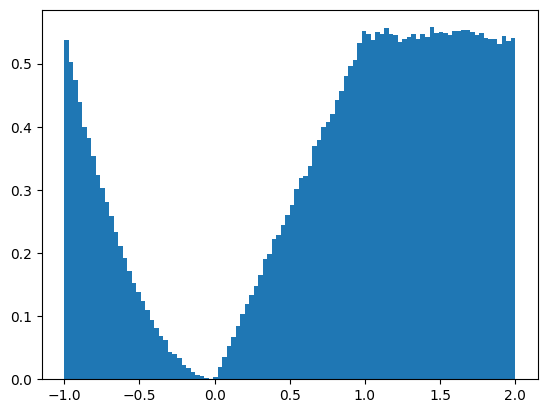

In [115]:
def sinh_X2():
    X = 0
    U = np.random.rand()*11/6 - 1/3
    if -1/3 <= U and U <= 0:
        X = -(3*(-U))**(1/3)
    elif 0 <= U and U <= 1/2:
        X = (2*U)**(1/2)
    else:
        U += 0.5 # tịnh tiến lên đoạn đúng là [1, 2]
        X = U
    return X

N = 4*(10**5)
X1 = [sinh_X2() for _ in range(N)]
plt.hist(X1, bins=100, density=True)
plt.show()

### Cách 2: Lấy mẫu loại bỏ.

Acceptance rate (Z): 0.6117


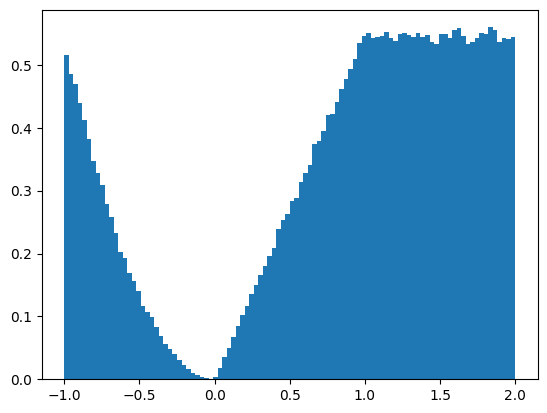

In [116]:
def Rejection_Sampling(n):
    T = 0
    ac = []
    i = 0
    while i < n:
        T += 1
        x = np.random.rand()*3 - 1
        y = np.random.rand()
        if (-1 <= x and x <= 0):
            if y <= x**2:
                i += 1
                ac.append(x)
        elif 0 < x and x <= 1 :
            if y <= x:
                i += 1
                ac.append(x)
        elif 1 < x and x <= 2:
            if y <= 1:
                i += 1
                ac.append(x)
    return ac, T

N = 4*(10**5)
X2 = Rejection_Sampling(N)
plt.hist(X2[0], bins=100, density = True)
print("Acceptance rate (Z):", round(N/X2[1], 4))

## b/ So sánh 2 thuật toán.

        N = 10^6

In [117]:
print("Tỉ lệ thành công cách 2", round(N/X2[1], 4))
print('Số lần gieo của cách 2:', X2[1])

Tỉ lệ thành công cách 2 0.6117
Số lần gieo của cách 2: 653902


|<center><div style="width:150px">Tiêu chí</div><center>|<center><div style="width:150px">Cách 1</div><center>|<center><div style="width:290px">Cách 2</div><center>|<center><div style="width:290px">Giải thích</div><center>|
|----------|----------|---------- |:-------------:|
|<center>Tỉ lệ thành công mỗi lần gieo<center>| <center>100%<center>  | <center>~61%<center> | <center>Cách 2 mẫu bị loại chiến ~39%<center> |
|<center>Số biến ngẫu nhiêu được mỗi lần gieo thành công<center>| <center>1 biến<center>  |   <center>>2 biến<center>   |  <center>Cách 2: ~63% khả năng mẫu được chấp nhận <center> |
|<center>Số lần sinh<center>| <center> 10^6 <center>  |<center>~1630000 > 10^6<center> | <center>Vì có mẫu bị loại nên ta gieo đến khi đủ 10^6 mẫu được chấp nhận<center> |
|<center>Thời gian<center>| <center>Nhanh hơn cách 2<center>  | <center>Chậm hơn cách 1<center> | <center> Vì tốn nhiều biến ngẫu nhiên hơn, số lần sinh nhiêu hơn<center> |

# Câu 6 (1,5 điểm)

## a/
Dùng 2 biến ngẫu nhiên

In [118]:
def cau_6a():
    X = np.random.rand()
    Y = np.random.rand()
    if Y - 2*X >= 0:
        X = X + 1 # Tịnh tiến
    return X, Y

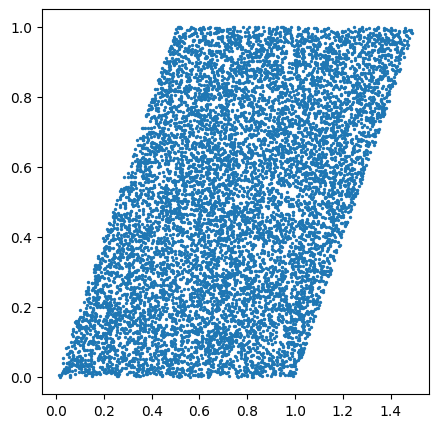

In [119]:
N = 10000
XX = []
YY = []

for i in range(N):
    tmp = cau_6a()
    XX.append(tmp[0])
    YY.append(tmp[1])
plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s = 2)
plt.show()

## b/
Dùng 2 biến ngẫu nhiên. Biến X dùng để chia điểm thuộc phần trên hay phần dưới. Đồng thời cũng đc đóng vai trò là bán kính mỗi phần.

In [120]:
def circle(x, y, tmp):
    r = math.sqrt(x)
    if tmp == 1:
        r = r/2
    theta = y*2*np.pi
    x, y = r*np.cos(theta), r*np.sin(theta)
    return x, y

def cau_6b():
    Y = 0
    while True:
        X = np.random.rand()
        Y = np.random.rand()
        if X <= 0.2:
            tmp = circle(X*5, Y, 1)
            return (tmp[0] + 1, abs(tmp[1]))
        else:
            tmp = circle((X-0.2)*10/8, Y, 0)
            return (tmp[0] + 1, -abs(tmp[1]))

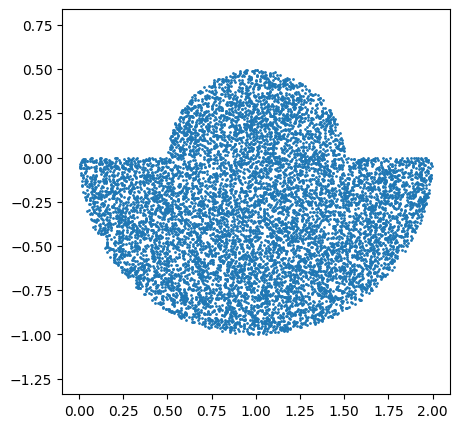

In [121]:
N = 10000
YY = []
XX = []
for i in range(N):
    tmp = cau_6b()
    XX.append(tmp[0])
    YY.append(tmp[1])

plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s = 1)
plt.axis("equal")
plt.show()